## Dowloading the Dataset

In [2]:
url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1"

In [3]:
import tensorflow as tf

In [4]:
dataset=tf.keras.utils.get_file("aclImdb_v1",
                        url,
                        untar=True,
                        cache_dir= ".",
                        cache_subdir=" ")

In [5]:
import os 
dataset_dir = os.path.join(os.path.dirname(dataset),"aclImdb")

In [6]:
os.listdir(dataset_dir)

['imdbEr.txt', 'test', 'imdb.vocab', 'README', 'train']

In [7]:
train_dir = os.path.join(dataset_dir,"train")
os.listdir(train_dir)

['urls_unsup.txt',
 'neg',
 'urls_pos.txt',
 'unsup',
 'urls_neg.txt',
 'pos',
 'unsupBow.feat',
 'labeledBow.feat']

In [8]:
sample_file = os.path.join(train_dir,"pos/1181_9.txt")
with open(sample_file) as f:
    print(f.read())
# Etiketi pozitif olan örnek bir data

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [9]:
remove_dir = os.path.join(train_dir,"unsup")
import shutil 
shutil.rmtree(remove_dir)

## Loading the Dataset

In [10]:
batch_size = 32
seed = 42
raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.20,
    subset="training",
    seed=seed
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [11]:
import numpy as np
# Veri setindeki 1 örnekteki 3 metni ve labeli aldık ve yazdırdık
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(3):
        print("Review",text_batch.numpy()[i])
        print("Label",label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [12]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.20,
    subset="validation",
    seed=seed
)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [13]:
# Test Verisi oluşturuyoruz.
test_dir = os.path.join(dataset_dir,"test")
raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
)

Found 25000 files belonging to 2 classes.


## Data Preporcessing

In [14]:
# Yukarıdaki örnekte de görüldüğü üzere metin içerisinde html tagleriyle geliyor ilk önce onu temizlemeliyiz.
import re 
import string
def custom_standartization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase,'<br />','')
    return tf.strings.regex_replace(stripped_html,'[%s]'% re.escape(string.punctuation),'')

In [15]:
from tensorflow.keras.layers import TextVectorization
max_features = 10000
sequence_length =250
vectorization_layer = TextVectorization(
    standardize = custom_standartization,
    max_tokens = max_features,
    output_mode = "int",
    output_sequence_length= sequence_length
)

In [16]:
train_text = raw_train_ds.map(lambda x, y:x)
vectorization_layer.adapt(train_text)

In [17]:
def vectorize_text(text,label):
    text = tf.expand_dims(text,-1)
    return vectorization_layer(text),label

In [18]:
text_batch, label_batch = next(iter(raw_train_ds))

In [19]:
first_review, first_label = text_batch[0], label_batch[0]
print("Review: ", first_review)
print("Label: ", raw_train_ds.class_names[first_label])
print ("--------------------")
print("Vectorized Review: ", vectorize_text(first_review,first_label))

Review:  tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label:  neg
--------------------
Vectorized Review:  (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  85,   17,  257,    2,  222,    1,  574,   30,  227,   10, 2401,
           1,   52,   23,   25,  426,  248,   12,  306,  279,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0

In [20]:
# Bazı vektörlere karşılık gelen kelimeler ve varolan kelime uzunluğu

print("132 ---> ",vectorization_layer.get_vocabulary()[132])
print("3421 ---> ",vectorization_layer.get_vocabulary()[3421])
print("Vocabulary Size: {}".format(len(vectorization_layer.get_vocabulary())))

132 --->  such
3421 --->  adams
Vocabulary Size: 10000


In [21]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)
# map fonksiyonunu kullanarak her bir örneği vectorize_text fonksiyonuyla dönüştürmek anlamına gelir. 
# Yani, mesela raw_train_ds içindeki her bir metin örneği, vectorize_text fonksiyonu tarafından vektörleştirilir.

## Configure the Dataset for Performance

In [22]:
# Performans arttırmak için prefetch ve cache kullanıyoruz
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds .cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)
# prefetch(buffer_size) fonksiyonu, veri setinden kaç öğenin önceden yüklenmesi gerektiğini belirtir.
# Bu da eğitim sırasında veri setinden sürekli olarak öğe alınmasını sağlar, 
# böylece model eğitim sürecini veri yüklemesiyle daha etkin bir şekilde birleştirebilir.

## Creating the Model

In [23]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features +1,embedding_dim),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])
# Dropout Katmanı Aşırı öğrenmeyi önlemek için 
# eğitim sırasında rasgele seçilen %20'lik bir oranda nöronları devre dışı bırakır.

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160033 (625.13 KB)
Trainable params: 160033 (625.13 KB)
Non-trainable params: 0 (0.00 Byte)
________________

## Compiling the Model

In [27]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer="adam",
              metrics=tf.keras.metrics.BinaryAccuracy(threshold=0.0)
              )

## Training the Model

In [28]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 0.6656 - binary_accuracy: 0.6907 - val_loss: 0.6179 - val_binary_accuracy: 0.7712
Epoch 2/10
625/625 [==============================] - 2s 2ms/step - loss: 0.5519 - binary_accuracy: 0.8007 - val_loss: 0.5021 - val_binary_accuracy: 0.8220
Epoch 3/10
625/625 [==============================] - 2s 2ms/step - loss: 0.4490 - binary_accuracy: 0.8432 - val_loss: 0.4244 - val_binary_accuracy: 0.8482
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3836 - binary_accuracy: 0.8630 - val_loss: 0.3783 - val_binary_accuracy: 0.8602
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3399 - binary_accuracy: 0.8752 - val_loss: 0.3495 - val_binary_accuracy: 0.8672
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3102 - binary_accuracy: 0.8849 - val_loss: 0.3307 - val_binary_accuracy: 0.8698
Epoch 7/10
625/625 [==============================] - 3s 5ms/ste

## Evaluating the Model

In [29]:
loss,accuracy = model.evaluate(test_ds)
print("Loss : ",loss)
print("Accuracy : ",accuracy)

782/782 [==============================] - 2s 3ms/step - loss: 0.2362 - binary_accuracy: 0.9135
Loss :  0.23616226017475128
Accuracy :  0.9135199785232544


## Plot of Accuracy and Loss

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [31]:
import matplotlib.pyplot as plt
acc = history_dict["binary_accuracy"]
val_acc = history_dict["val_binary_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

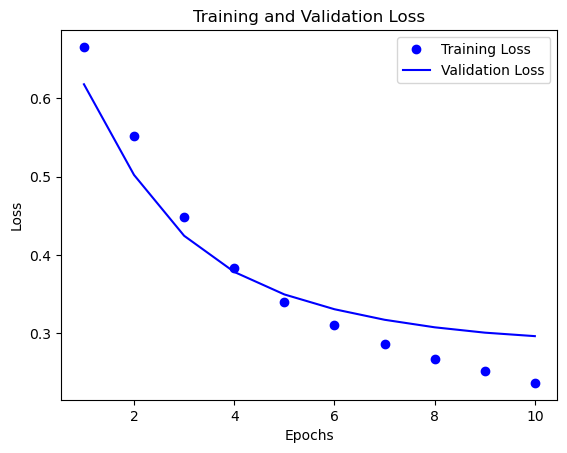

In [32]:
epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,"bo",label="Training Loss")
plt.plot(epochs,val_loss,"b",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

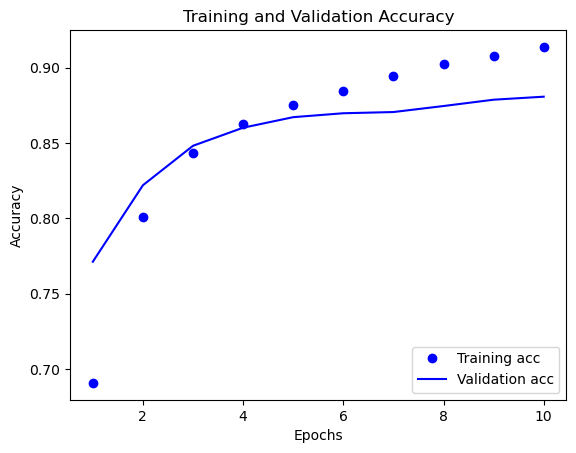

In [33]:
plt.plot(epochs,acc,"bo",label="Training acc")
plt.plot(epochs,val_acc,"b",label="Validation acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.show()

In [34]:
export_model = tf.keras.Sequential([
    vectorization_layer,
    model,
    tf.keras.layers.Activation("sigmoid")
])

In [35]:
export_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                     optimizer="adam",
                     metrics=["accuracy"])

In [36]:
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 2s 3ms/step - loss: 0.2362 - accuracy: 0.9135
0.9135199785232544


## Predict New Data

In [37]:
examples = [
    "the movie was perfect.",
    "the movie was okay but was too long.",
    "the movie was awful."
]

In [38]:
export_model.predict(examples)

1/1 [==============================] - 0s 90ms/step


array([[0.60008603],
       [0.36154902],
       [0.31057668]], dtype=float32)